In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from pylab import mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


In [17]:
def pre_process_data(total_text):
    """
    1.数据预处理
    将分词完毕的文本数据进行以下操作：
    （1）去除空格
    （2）去除标点符号
    （3）将英文全部转换为小写
    """
    total = []
    for i in total_text:
        text = i.lower()
        text = re.sub('[^a-zA-Z]', '', text)
        after_text = [j for j in text.strip().split('\t') if isinstance(j, str)]
        process_temp = ''.join(after_text)
        total.append(process_temp)

    return total

In [ ]:
def train_dataset(filename):
    """ 读取训练集 """
    train_data = pd.read_csv(filename, delimiter='\t')
    train_content = train_data['Phrase']
    train_content = pre_process_data(train_content)  # 处理训练集文本
    train_label = train_data['Sentiment']  # 获取训练集标签

    print("训练集特征长度：", len(train_content))  # 156060
    print("训练集标签长度：", len(train_label))  # 156060

    return train_content, train_label

In [ ]:
def test_dataset(filename):
    """ 读取测试集 """
    test_data = pd.read_csv(filename, delimiter='\t')
    test_content = test_data['Phrase']  # 处理测试集文本
    test_content = pre_process_data(test_content)  # 获取测试集标签

    print("测试集特征长度：", len(test_content))  # 66292

    return test_content

In [ ]:
def show_label(train_label):
    """
    查看评分的类别分布
    """
    labels = set(train_label)  # 计算不重复类别数目
    x = []
    y = []
    for i in labels:
        x.append(i)
        y.append(train_label[train_label == i].size)
    plt.figure(111)
    plt.bar(x, y)
    plt.xlabel("Label--标签/评分类别")
    plt.ylabel("count--总数")
    plt.show()

In [18]:
train_content, train_label = train_dataset(r'D:\PycharmProjects\RottenTomatoes-Kaggle\data\train.tsv')

训练集特征长度： 156060
训练集标签长度： 156060


In [19]:
train_content

['aseriesofescapadesdemonstratingtheadagethatwhatisgoodforthegooseisalsogoodforthegandersomeofwhichoccasionallyamusesbutnoneofwhichamountstomuchofastory',
 'aseriesofescapadesdemonstratingtheadagethatwhatisgoodforthegoose',
 'aseries',
 'a',
 'series',
 'ofescapadesdemonstratingtheadagethatwhatisgoodforthegoose',
 'of',
 'escapadesdemonstratingtheadagethatwhatisgoodforthegoose',
 'escapades',
 'demonstratingtheadagethatwhatisgoodforthegoose',
 'demonstratingtheadage',
 'demonstrating',
 'theadage',
 'the',
 'adage',
 'thatwhatisgoodforthegoose',
 'that',
 'whatisgoodforthegoose',
 'what',
 'isgoodforthegoose',
 'is',
 'goodforthegoose',
 'good',
 'forthegoose',
 'for',
 'thegoose',
 'goose',
 'isalsogoodforthegandersomeofwhichoccasionallyamusesbutnoneofwhichamountstomuchofastory',
 'isalsogoodforthegandersomeofwhichoccasionallyamusesbutnoneofwhichamountstomuchofastory',
 'isalso',
 'also',
 'goodforthegandersomeofwhichoccasionallyamusesbutnoneofwhichamountstomuchofastory',
 'forthegand

In [20]:
train_label

0         1
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        3
22        3
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
156030    2
156031    1
156032    1
156033    1
156034    1
156035    2
156036    1
156037    2
156038    2
156039    2
156040    2
156041    2
156042    2
156043    3
156044    2
156045    2
156046    2
156047    1
156048    2
156049    2
156050    2
156051    1
156052    1
156053    2
156054    2
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 156060, dtype: int64

In [22]:
test_content = test_dataset(r'D:\PycharmProjects\RottenTomatoes-Kaggle\data\test.tsv')

测试集特征长度： 66292


In [23]:
test_content

['anintermittentlypleasingbutmostlyroutineeffort',
 'anintermittentlypleasingbutmostlyroutineeffort',
 'an',
 'intermittentlypleasingbutmostlyroutineeffort',
 'intermittentlypleasingbutmostlyroutine',
 'intermittentlypleasingbut',
 'intermittentlypleasing',
 'intermittently',
 'pleasing',
 'but',
 'mostlyroutine',
 'mostly',
 'routine',
 'effort',
 '',
 'kidmanisreallytheonlythingthatsworthwatchinginbirthdaygirlafilmbythestagetrainedjezbutterworthlrbmojorrbthatservesasyetanotherexampleofthesaddeclineofbritishcomediesinthepostfullmontyworld',
 'kidman',
 'isreallytheonlythingthatsworthwatchinginbirthdaygirlafilmbythestagetrainedjezbutterworthlrbmojorrbthatservesasyetanotherexampleofthesaddeclineofbritishcomediesinthepostfullmontyworld',
 'isreallytheonlythingthatsworthwatchinginbirthdaygirlafilmbythestagetrainedjezbutterworthlrbmojorrbthatservesasyetanotherexampleofthesaddeclineofbritishcomediesinthepostfullmontyworld',
 'isreally',
 'is',
 'really',
 'theonlythingthatsworthwatchinginbi

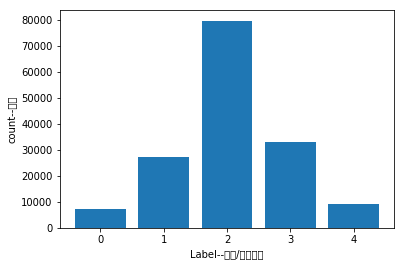

In [24]:
show_label(train_label)

In [25]:
train_tokenizer = Tokenizer()
train_tokenizer.fit_on_texts(train_content)
train_sequences = train_tokenizer.texts_to_sequences(train_content)

test_sequences = train_tokenizer.texts_to_sequences(test_content)

In [26]:
# 获得所有tokens的长度
num_tokens = [ len(tokens) for tokens in train_sequences ]
num_tokens = np.array(num_tokens)
print(len(num_tokens))

156060


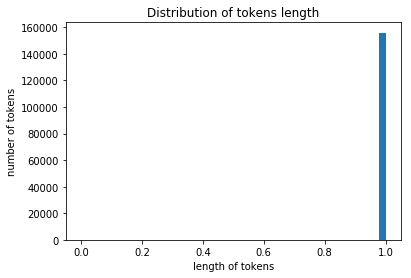

In [27]:
plt.hist((num_tokens), bins = 50)
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()
